# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('forestfires.csv')

# Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
print(df.duplicated().sum())

8


# Dropping Duplicates

In [5]:
df1=df.drop_duplicates()
df1=df.drop(['month', 'day'],1)
df1

C:\Users\ACER\AppData\Local\Temp/ipykernel_16820/715463144.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1=df.drop(['month', 'day'],1)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
x=df1.iloc[:,:28]

y=df['size_category']


Splitting data into training and testing data set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## **SVM MODEL**

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
model=SVC()
param_grid = [{'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
               'gamma': [1, 0.1, 0.01, 0.001],
               'C': [10,5,0.5]}]
GSV=GridSearchCV(model,param_grid,cv=10)
GSV.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 5, 0.5], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'sigmoid', 'poly', 'linear']}])

In [22]:
GSV.best_params_ , GSV.best_score_ 

({'C': 10, 'gamma': 1, 'kernel': 'linear'}, 0.9916666666666666)

In [25]:
model = SVC(C= 10,gamma= 1,kernel='linear')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.71794871794873


array([[ 39,   2],
       [  0, 115]], dtype=int64)

In [26]:
model2 = SVC(C= 10,gamma= 1,kernel='poly')
model2.fit(x_train , y_train)
y_pred2 = model2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred2)

Accuracy = 98.71794871794873


array([[ 38,   3],
       [  2, 113]], dtype=int64)

In [29]:
model3 = SVC(C= 10,gamma= 1,kernel='sigmoid')
model3.fit(x_train , y_train)
y_pred3 = model3.predict(x_test)
acc3 = accuracy_score(y_test, y_pred3) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred3)

Accuracy = 98.71794871794873


array([[  0,  41],
       [  0, 115]], dtype=int64)

Accuracy of final Model= 98.71794871794873


<AxesSubplot:>

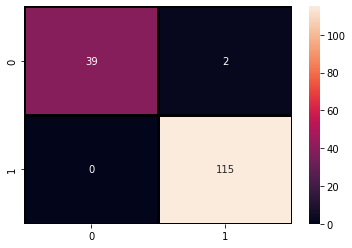

In [20]:
print("Accuracy of final Model=", acc)
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)

# Accuracy of final Model= 98.717 with C= 10,gamma= 1,kernel='linear'